# Projeto de Aprendizado de Máquina

### 2º semestre de 2022

#### Grupo formado por:
        Ana Clara Loponi - 220073
        Ana Clara Brandão - 220069
        Heitor Bernardes - 220052
        Lorraine Casseano - 220036

<ht> Idealmente, o projeto consiste em treinar uma máquina para prever possíveis surtos de dengue. Inicialmente, vamos usar dados coletados em Campinas, São Paulo, dos anos de 1998 à 2014 p/ mês, referentes ao número de casos confirmados, volume de chuva (em mm), temperatura mínima, temperatura máxima e temperatura média. </ht>

# Bloco 1

### Preparação dos Dados: Tratamento de Dados e Normalização  

In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
dados1 = pd.read_excel("dataset_dengue.xlsx") # Lendos os dados.

dados1.dtypes # Este comando informa quais os tipos de dados o dataframe contém.

data                    datetime64[ns]
casos-confirmados                int64
chuva                          float64
temperatura-media              float64
temperatura-mininima           float64
temperatura-maxima             float64
dtype: object

### Testando as formas de normalização

In [3]:
#padrão - teste
dados2 = dados1.copy()

media_chuva = dados2['chuva'].mean()
desvio_padrao_chuva = dados2['chuva'].std()

dados2['chuva_zscore'] = (dados2['chuva'] - media_chuva) / desvio_padrao_chuva

#print(dados2)

In [4]:
#maximo_absoluto
dados3 = dados1.copy()

maximo_absoluto = dados3['chuva'].max()

dados3['chuva_max_abs'] = dados3['chuva'] / maximo_absoluto

#print(dados3)

### Normaliação por Máximo e Mínimo Absoluto

In [5]:
#maximo_e_minimo_absoluto
#chuva
dados4 = dados1.copy()

maximo_chuva = dados4['chuva'].max()
minimo_chuva = dados4['chuva'].min()

dados4['chuva_min_max_abs'] = (dados4['chuva'] - minimo_chuva) / (maximo_chuva - minimo_chuva)

print(dados4)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima  chuva_min_max_abs  
0                    20.2                28.1           0.395760  
1                    20.0                28.0           0.499779  
2                    22.4                2

In [6]:
#temperatura

maximo_temp_med = dados4['temperatura-media'].max()
minimo_temp_med = dados4['temperatura-media'].min()

dados4['temp-med_min_max_abs'] = (dados4['temperatura-media'] - minimo_temp_med) / (maximo_temp_med - minimo_temp_med)

print(dados4)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima  chuva_min_max_abs  \
0                    20.2                28.1           0.395760   
1                    20.0                28.0           0.499779   
2                    22.4              

In [7]:
#temperatura_mínima

maximo_temp_min = dados4['temperatura-mininima'].max()
minimo_temp_min = dados4['temperatura-mininima'].min()

dados4['temp-min_min_max_abs'] = (dados4['temperatura-mininima'] - minimo_temp_min) / (maximo_temp_min - minimo_temp_min)

print(dados4)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima  chuva_min_max_abs  \
0                    20.2                28.1           0.395760   
1                    20.0                28.0           0.499779   
2                    22.4              

In [8]:
#tempertura_máxima

maximo_temp_max = dados4['temperatura-maxima'].max()
minimo_temp_max = dados4['temperatura-maxima'].min()

dados4['temp-max_min_max_abs'] = (dados4['temperatura-maxima'] - minimo_temp_max) / (maximo_temp_max - minimo_temp_max)

print(dados4)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima  chuva_min_max_abs  \
0                    20.2                28.1           0.395760   
1                    20.0                28.0           0.499779   
2                    22.4              

In [9]:
#casos_confirmados

maximo_casos = dados4['casos-confirmados'].max()
minimo_casos = dados4['casos-confirmados'].min()

dados4['casos_min_max_abs'] = (dados4['casos-confirmados'] - minimo_casos) / (maximo_casos - minimo_casos)

print(dados4)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima  chuva_min_max_abs  \
0                    20.2                28.1           0.395760   
1                    20.0                28.0           0.499779   
2                    22.4              

In [10]:
#Identificamos o número de linhas do nosso dataset como índices, pois entendemos a quantidade de meses durante os anos de 1998 à 2014 como uma feature. 
#Assim, ao invés de agruparmos por data, agrupamos por meses a partir de Janeiro/1998, facilitando a resolução do problemas.

print(dados1.index)

RangeIndex(start=0, stop=204, step=1)


### Análise Exploratória dos Dados

In [11]:
#Média de cada coluna de dados

M1 = dados1["casos-confirmados"].mean()

M2 = dados1["chuva"].mean()

M3 = dados1["temperatura-mininima"].mean()

M4 = dados1["temperatura-maxima"].mean()

print(M1, M2, M3, M4)

357.53921568627453 112.07549019607842 17.679411764705883 25.565196078431374


In [12]:
#Desvio Padrão

D1 = dados1["casos-confirmados"].std()

D2 = dados1["chuva"].std()

D3 = dados1["temperatura-mininima"].std()

D4 = dados1["temperatura-maxima"].std()

print(D1, D2, D3, D4)

1741.8147587005246 97.3904390734082 3.336315723659817 2.2498635888116434


Observando esses resultados, concluimos que eles não eram satisfatórios, e não forneciam as informações que precisavamos. Por isso, optamos por uma análise diferente, fazendo uma separação referente aos meses, de forma que as médias sejam separadas em média_janeiro, média_fevereiro, média_março e assim por diante.

In [13]:
dados5 = dados1.drop(columns = ['data'], axis = 1)
print(dados5)

     casos-confirmados  chuva  temperatura-media  temperatura-mininima  \
0                  237  179.2               25.7                  20.2   
1                  331  226.3               25.1                  20.0   
2                  562  149.1               24.8                  22.4   
3                  187   46.4               22.7                  18.1   
4                   32   88.3               19.2                  15.7   
..                 ...    ...                ...                   ...   
199                 55   12.2               20.6                  13.1   
200                 40   69.2               23.0                  18.6   
201                 40   15.6               24.7                  17.2   
202                 57  154.8               25.0                  22.1   
203                 37  232.8               24.9                  21.3   

     temperatura-maxima  
0                  28.1  
1                  28.0  
2                  27.2  
3      

In [14]:
#Separando os dados e colocando-os em listas iteraveis

conv = dados5.values.tolist() # função que transforma de dataset para lista

casos = []
chuva = []
tem_med = []
tem_max = []
tem_min = []

for i in conv:
    for j in range(0, len(i), 5):
        casos.append(i[j])

for i in conv:
    for j in range(1, len(i), 5):
        chuva.append(i[j])
        
for i in conv:
    for j in range(2, len(i), 5):
        tem_med.append(i[j])
        
for i in conv:
    for j in range(3, len(i), 5):
        tem_min.append(i[j])
        
for i in conv:
    for j in range(4, len(i), 5):
        tem_max.append(i[j])
        

#print(casos)
#print(chuva)
#print(tem_med)
#print(tem_min) 
#print(tem_max)

In [15]:
def separacao(x, c):
    
    """ Separa os dados por mês e calcula a média e desvio padrão """
    
    if c >= 12: # Critério de parada
        return 0 
    
    else:

        lista = []  # Para armazernar e processar os dados 
        lista2 = []
    
        for i in range(c,len(x),12): # Separa os dados por meses, fazendo uma listagem dos dados com um intervalo de 12 itens
            lista.append(x[i])
    
    m = np.mean(lista) # função do numpy para calculo de media 
    dp = np.std(lista) # função do numpy para calculo de desvio padrão
    lista2.append(m)
    lista2.append(dp)
    
        
    lista.clear() # Ao final da operação, a lista é esvaziada para não ter problemas
    
    print(lista2)
    
    return separacao(x, c + 1)  # Usei recursão para seguir calculando para os demais meses  

In [16]:
# Variável para servir de inicio para a contagem
contagem = 0 
print(separacao(casos, contagem))
print(separacao(chuva, contagem))
print(separacao(tem_med, contagem))
print(separacao(tem_min, contagem))
print(separacao(tem_max, contagem))

[84.29411764705883, 86.19387497406636]
[271.7647058823529, 420.0032954228931]
[919.1764705882352, 1844.583493088827]
[1829.5294117647059, 4778.14081635312]
[955.7058823529412, 2456.901031421635]
[142.41176470588235, 313.971909351126]
[21.529411764705884, 35.72627579257206]
[11.176470588235293, 12.825687891734844]
[10.0, 12.874964306061315]
[11.588235294117647, 14.641033487827816]
[12.588235294117647, 17.425670123090082]
[20.705882352941178, 21.545477772765853]
0
[282.5705882352941, 95.64846645371841]
[166.11176470588236, 74.13112295792814]
[142.89999999999998, 68.48547291214393]
[66.31764705882354, 50.1849899670517]
[60.911764705882355, 39.86528612793697]
[43.017647058823535, 38.37982367145403]
[41.811764705882354, 45.09142193566234]
[22.735294117647058, 24.262315033727674]
[54.182352941176475, 33.761224456713784]
[105.63529411764705, 65.00958247173095]
[151.8470588235294, 77.03406517399841]
[206.86470588235295, 71.59512751393788]
0
[24.205882352941178, 1.0849074713786824]
[24.81176470

<AxesSubplot:>

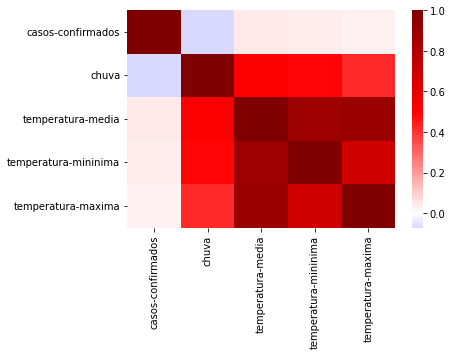

In [17]:
# matriz de correlação
# Conexão entre dois fatores para compreender as informações e dependências entre as features.
# Os coeficientes de correlação são padronizados. A correlação mede tanto a força como a direção da relação linear entre duas variáveis

dados_corr = dados1.corr()
dados_corr
sns.heatmap(dados_corr, cmap='seismic', center=0)

### Gráficos

In [18]:
#Carregando o Dataset
iris = sns.load_dataset('iris')

#visualização das linhas do dataset
dados1.head(5)

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9


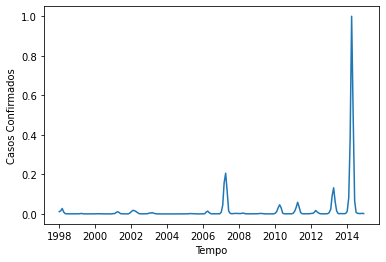

In [19]:
#dados1["casos-confirmados"] = np.log10(dados1["casos-confirmados"])

plt.plot(dados4['data'], dados4['casos_min_max_abs'])
plt.xlabel('Tempo')
plt.ylabel('Casos Confirmados')
plt.show()

#plt.bar(dados1['data'],dados1['casos-confirmados'])

# Bloco 2

<ht> Iniciando os processos de machine learning, foram treinados quatro diferentes modelos de aprendizado (Baseline, k-NN, Árvore de decisão e Floreta aleatória), afim de avaliar o mais adequado para o dataset, baseando-se em valores de Raiz Quadrada do Erro Médio (RMSE), para a previsão de cada modelo. </ht>

In [20]:
#importação de bilbiotecas
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from itertools import product
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
from sklearn import tree
from itertools import product
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [21]:
#Inserir uma coluna "meses" para usar como referência de data, com os mesmos valores que o index
meses = []
for i in dados1.index:
    meses.append(i)

dados5.insert(5, "meses", meses, True)
dados5

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima,meses
0,237,179.2,25.7,20.2,28.1,0
1,331,226.3,25.1,20.0,28.0,1
2,562,149.1,24.8,22.4,27.2,2
3,187,46.4,22.7,18.1,26.0,3
4,32,88.3,19.2,15.7,22.9,4
...,...,...,...,...,...,...
199,55,12.2,20.6,13.1,24.7,199
200,40,69.2,23.0,18.6,26.8,200
201,40,15.6,24.7,17.2,30.0,201
202,57,154.8,25.0,22.1,28.3,202


### Treino, Teste e Baseline

In [22]:
# Definir datasets de treino e teste, e hiperparâmetros gerais para todos os testes.  
# Estratégia Holdout

TAMANHO_TESTE = 0.15 # quantidade de dados usados para o teste (15%)
SEMENTE_ALEATORIA = 469
FEATURES = ["chuva", "temperatura-media", "temperatura-mininima", "temperatura-maxima", "meses"]
TARGET = ["casos-confirmados"]

df = dados5

indices = df.index
indices_treino, indices_teste = train_test_split( 
    #função de sorteio pseudo-aleatório para separação de identificadores únicos no DataFrame.
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
    #esta função faz com que a separação dos dados seja aleatória, mas sempre seja a mesma.
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

#print(X_treino)
#print(y_teste)

In [23]:
# Normalizador 

normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino)
normalizador_y.fit(y_treino)

MinMaxScaler()

In [24]:
# Dados normalizados 

# cria o modelo
# modelo Dummy: modelo fictício
modelo_baseline = DummyRegressor()

# treina o modelo
modelo_baseline.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

# realiza uma previsão usando o modelo treinado
previsao = modelo_baseline.predict(normalizador_x.transform(X_teste))

# Raiz quadrada do erro médio
y_verdadeiro = normalizador_y.transform(y_teste)
y_previsao = modelo_baseline.predict(normalizador_x.transform(X_teste))

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo baseline foi de {RMSE}.")

O RMSE do modelo baseline foi de 0.02419979195025817.


In [25]:
# Dados sem normalização

# cria o modelo
modelo_baseline = DummyRegressor()

# treina o modelo
modelo_baseline.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_baseline.predict(X_teste)

# Raiz quadrada do erro médio (base para avaliar o desempenho do modelo)

y_verdadeiro = y_teste
y_previsao = modelo_baseline.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo baseline para os dados foi de {RMSE}.")

O RMSE do modelo baseline para os dados foi de 494.3533499598738.


### K vizinhos mais próximos

In [26]:
# cria o modelo
# Dados similares estão em regiões próximas. Apenas memoriza dados rotulados de treinamento (Aprendizado Indutivo) e não modelos compactos
modelo_knn = KNeighborsRegressor()  

# treina o modelo
modelo_knn.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(normalizador_x.transform(X_treino))

O RMSE do modelo k-NN usando k = 3, para os dados normalizados foi de 0.03382389357649117.

O RMSE do modelo k-NN usando k = 4, para os dados normalizados foi de 0.03916618334770383.

O RMSE do modelo k-NN usando k = 6, para os dados normalizados foi de 0.03368060805735033.

O RMSE do modelo k-NN usando k = 12, para os dados normalizados foi de 0.027599737931696355.



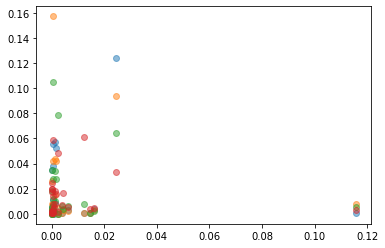

In [27]:
# 1º Teste: Comparação Hiperparâmetro e Número de Vizinhos
# Hiperparâmetros: Conjunto de parâmetros definidos antes do treino e não irão se alterar durante o processo.

VIZINHOS = [3, 4, 6, 12]

for n in VIZINHOS:
    
    modelo_knn = KNeighborsRegressor(n_neighbors=n) # cria um modelo

    modelo_knn.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino)) # treina o modelo

    y_verdadeiro = normalizador_y.transform(y_teste)
    y_previsao = modelo_knn.predict(normalizador_x.transform(X_teste))
    
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False) # Raiz quadrada do erro médio
    print(f"O RMSE do modelo k-NN usando k = {n}, para os dados normalizados foi de {RMSE}.")
    print()
    
    # Gráfico de desempenho
    plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

O RMSE do modelo k-NN usando k = 1, para os dados normalizados, foi de 0.026519787585253474.

O RMSE do modelo k-NN usando k = 3, para os dados normalizados, foi de 0.03382389357649117.

O RMSE do modelo k-NN usando k = 7, para os dados normalizados, foi de 0.031125439427175557.

O RMSE do modelo k-NN usando k = 11, para os dados normalizados, foi de 0.028146650090740303.



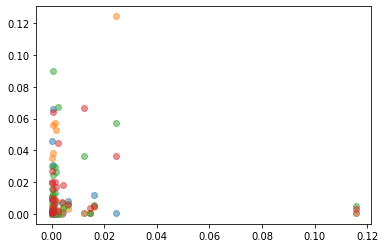

In [28]:
# Número de vizinhos ímpares

VIZINHOS = [1, 3, 7, 11] 

for n in VIZINHOS:
    
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

    y_verdadeiro = normalizador_y.transform(y_teste)
    y_previsao = modelo_knn.predict(normalizador_x.transform(X_teste))

    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k = {n}, para os dados normalizados, foi de {RMSE}.")
    print()
    
    plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

O RMSE do modelo k-NN usando k=3 foi de 763.2373020309408.

O RMSE do modelo k-NN usando k=4 foi de 640.55906151605.

O RMSE do modelo k-NN usando k=6 foi de 592.2140418177916.

O RMSE do modelo k-NN usando k=12 foi de 720.7450171206882.



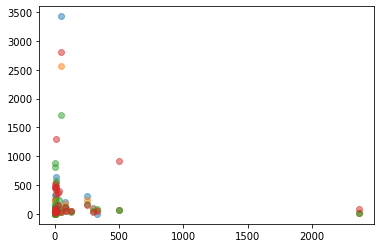

In [29]:
#2º Teste: Dados não normalizados
VIZINHOS = [3, 4, 6, 12]

for n in VIZINHOS:
    
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)
    
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} foi de {RMSE}.")
    print()
    
    plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

O RMSE do modelo k-NN usando k=1 foi de 1426.334621192693.

O RMSE do modelo k-NN usando k=3 foi de 763.2373020309408.

O RMSE do modelo k-NN usando k=7 foi de 548.9407023236157.

O RMSE do modelo k-NN usando k=11 foi de 741.4557612973797.



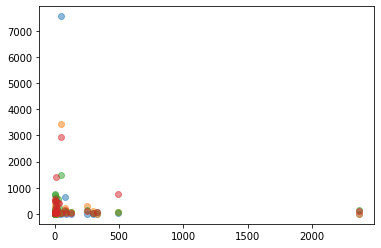

In [30]:
VIZINHOS = [1, 3, 7, 11]

for n in VIZINHOS:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)
    
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} foi de {RMSE}.")
    print()
    
    plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

### Regressão Linear

O RMSE do modelo linear foi de 0.03533730667134907


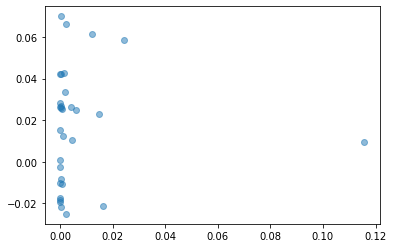

In [31]:
# 1º Dados Normalizados
# Relacionando linearmente as features com o target esse modelo é útil nas análises das previsões.

# cria o modelo
modelo_linear = LinearRegression()

# treina o modelo
modelo_linear.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino),)

# Raiz quadrada do erro médio
y_verdadeiro = normalizador_y.transform(y_teste)

# realiza uma previsão usando o modelo treinado
y_previsao = modelo_linear.predict(normalizador_x.transform(X_teste))

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo linear foi de {RMSE}")

plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

O RMSE do modelo linear foi de 721.8705006823202.


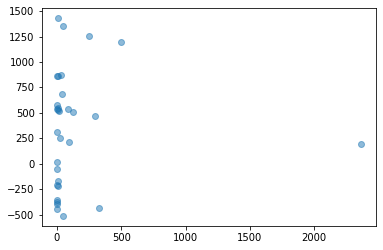

In [32]:
# 2º Teste: Dados sem normalização
# treina o modelo
modelo_linear.fit(X_treino, y_treino)

# Raiz quadrada do erro médio
y_verdadeiro = y_teste

# realiza uma previsão usando o modelo treinado
y_previsao = modelo_linear.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo linear foi de {RMSE}.")

plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

### Árvore de Decisão

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.028644226612053767.

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=5 foi de 0.03767080336994236.

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.04146841183679821.

O RMSE do modelo AD usando max_leaf_nodes=3 e max_depth=None foi de 0.02074607914931531.

O RMSE do modelo AD usando max_leaf_nodes=3 e max_depth=5 foi de 0.02074607914931531.

O RMSE do modelo AD usando max_leaf_nodes=3 e max_depth=10 foi de 0.02074607914931531.

O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=None foi de 0.039751905212104734.

O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=5 foi de 0.039751905212104734.

O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=10 foi de 0.039751905212104734.



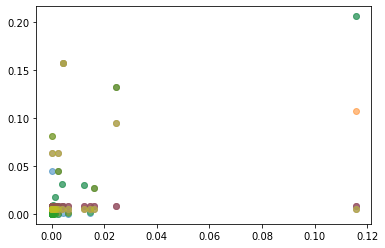

In [33]:
# 1º Teste: Escolha dos Hiperparâmetros
# Grafos Direcionais e conceito de recusão. O algoritmo de árvores de decisão não é determinístico! Sendo assim, algoritmos usados em estratégias de busca que não exploram o espaço amostral. Os algoritmos encontram soluções razoáveis, mas não a melhor solução.

NUM_FOLHAS = [None, 3, 10]
NUM_PROFUNDIDADE = [None, 5, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_dt.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

    y_verdadeiro = normalizador_y.transform(y_teste)
    y_previsao = modelo_dt.predict(normalizador_x.transform(X_teste))
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE}."
    )
    print()
    plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

O RMSE do modelo árvore de decisão, para os dados normalizados, foi de 0.02074607914931531.


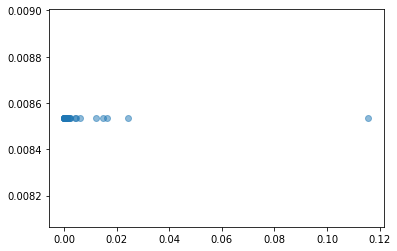

In [34]:
# 2º Teste: Dados Normalizados
# cria o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=3,
    max_depth=None,
    random_state=SEMENTE_ALEATORIA,
)
# treina o modelo
modelo_dt.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))


# Raiz quadrada do erro médio
y_previsao = modelo_dt.predict(normalizador_x.transform(X_teste))
y_verdadeiro = normalizador_y.transform(y_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo árvore de decisão, para os dados normalizados, foi de {RMSE}.")

plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

O RMSE do modelo árvore de decisão foi de 423.8009048622132


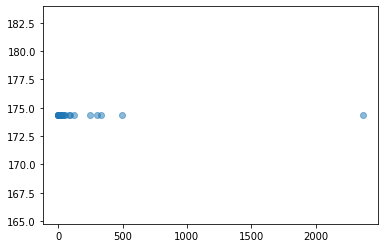

In [35]:
# 3º Teste: Dados não Normalizados
# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)

# Raiz quadrada do erro médio 
y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo árvore de decisão foi de {RMSE}")

plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

O RMSE do modelo AD usando max_leaf_nodes=3 foi de 0.02074607914931531


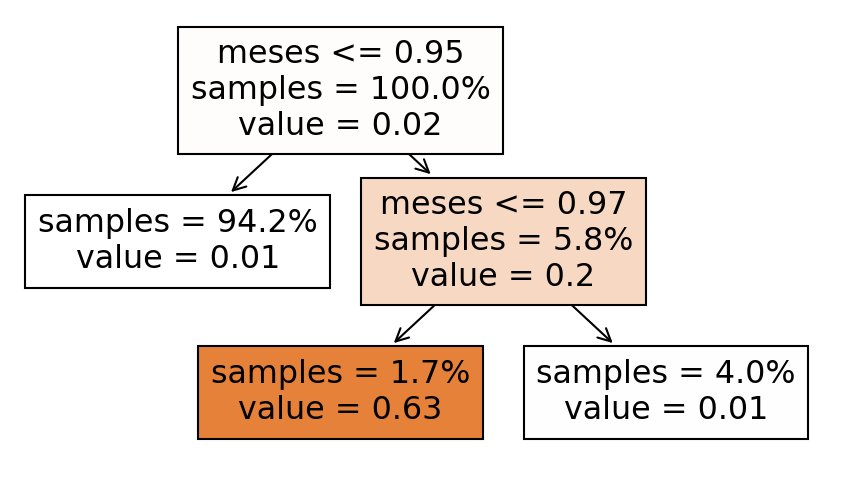

In [36]:
# Grafo: Árvore de Decisão
# cria e treina o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=3,
    max_depth=None,
    random_state=SEMENTE_ALEATORIA,
)
modelo_dt.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

y_verdadeiro = normalizador_y.transform(y_teste)
y_previsao = modelo_dt.predict(normalizador_x.transform(X_teste))
RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print( f"O RMSE do modelo AD usando max_leaf_nodes={3} foi de {RMSE}")

# cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(7, 4),
    dpi=150,
)

# plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)

# mostra o plot para o usuário
plt.show()

### Floresta Aleatória

In [37]:
# Estabelecida por diversas árvores de decisão e tem o processo de construção das árvores envolvendo amostragem dos exemplos e das features, por isso é dada aleatoriamente.
# 1º Teste: Hiperparâmetros

NUM_ARVORES = [10, 100]
NUM_FOLHAS = [None, 6]
NUM_PROFUNDIDADE = [None, 3]

# alterando o formato do target
y_treino2 = y_treino.ravel()
y_teste2 = y_teste.ravel()

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino, y_treino2)

    y_verdadeiro = y_teste2
    y_previsao = modelo_rf.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE}."
    )
    print()

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi de 362.70935000444246.

O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=None foi de 376.12785722925526.

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=3 foi de 382.29026082544084.

O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=3 foi de 414.2213563570962.

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=None foi de 378.52564390388454.

O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=None foi de 413.870293742276.

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=3 foi de 370.2274716230662.

O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=3 foi de 407.65154406094376.



O RMSE do modelo árvore de decisão foi de 362.70935000444246.


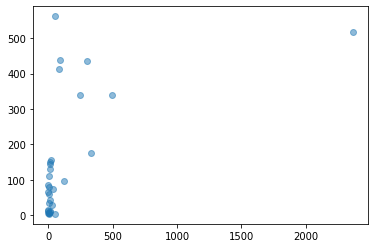

In [38]:
# 2º Teste: Dados não normalizados
# cria o modelo
modelo_rf = RandomForestRegressor(n_estimators=10, random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_treino, y_treino2)

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo árvore de decisão foi de {RMSE}.")

plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

### Importância das Features

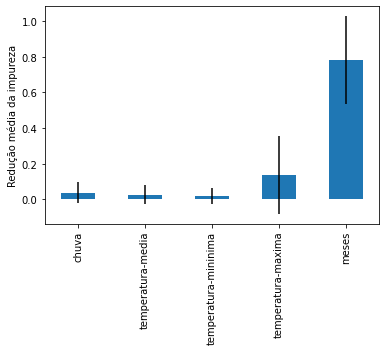

In [39]:
importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)

serie_importancia = pd.Series(importancia, index=FEATURES)

fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Redução média da impureza")
plt.show()

### Comparando os Desempenhos dos modelos de Regressão

Melhor Modelo: Árvore de decisão
<br> Para o nosso grupo, a árvore de decisão se aplicou mais apropriadamente devido à explicação mais abrangente dos dados. Pois, além de dividir o problema em partes menores, isso possibilita um processo recursivo. Esses subespaços podem ser alterados em diferentes modelos.
<br> A árvore de decisão é um grafo direcionado acíclico com nós de divisão, onde se estabelecem funções ou nós de divisão, que realizam testes condicionais.

### Classificação

In [43]:
# Matriz de confusão

#confusion_matrix(y_previsao, y_teste2)

In [ ]:
TARGET = ["casos-confirmados"]
df[TARGET].hist(bins=150)

#### Categorização

In [ ]:
# Separa o número de casos

logic = df["casos-confirmados"] <= 20
print(len(df.loc[logic]),'Casos raros/isolados')
logic = (df["casos-confirmados"] > 20) & (df["casos-confirmados"] <= 50)
print(len(df.loc[logic]),'Pouquissimos casos')
logic = (df["casos-confirmados"] > 50) & (df["casos-confirmados"] <= 250)
print(len(df.loc[logic]),'Poucos casos')
logic = (df["casos-confirmados"] > 250) & (df["casos-confirmados"] <= 1000)
print(len(df.loc[logic]),'Numero medio de casos')
logic = (df["casos-confirmados"] > 1000) & (df["casos-confirmados"] <= 2500)
print(len(df.loc[logic]),'Muitos casos')
logic = (df["casos-confirmados"] > 2500)
print(len(df.loc[logic]),'Surtos de dengue')

In [ ]:
# Adiciona uma coluna com a categorização ao dataset

df['casos-categórico'] = None

logic = df["casos-confirmados"] <= 20
df.loc[logic, 'casos-categórico'] ='Casos raros/isolados'
logic = (df["casos-confirmados"] > 20) & (df["casos-confirmados"] <= 50)
df.loc[logic, 'casos-categórico'] = 'Pouquissimos casos'
logic = (df["casos-confirmados"] > 50) & (df["casos-confirmados"] <= 250)
df.loc[logic, 'casos-categórico'] = 'Poucos casos'
logic = (df["casos-confirmados"] > 250) & (df["casos-confirmados"] <= 1000)
df.loc[logic, 'casos-categórico'] = 'Numero medio de casos'
logic = (df["casos-confirmados"] > 1000)  & (df["casos-confirmados"] <= 2500)
df.loc[logic, 'casos-categórico'] = 'Muitos casos'
logic = (df["casos-confirmados"] > 2500)  
df.loc[logic, 'casos-categórico'] = 'Surtos de dengue'
print(df)

In [ ]:
# Converte dados categoricos em numéricos 

conversao = {
    "Casos raros/isolados": 1,
    "Pouquissimos casos": 2,
    "Poucos casos": 3,
    "Numero medio de casos": 4,
    "Muitos casos": 5,
    "Surtos de dengue": 6,
}

df["cc"] = df["casos-categórico"].map(conversao)

print(df)

In [ ]:
# Treinando um novo modelo.
# Definir datasets de treino e teste, e hiperparâmetros gerais para todos os teste   

TAMANHO_TESTE = 0.15 # quantidade de dados usados para o teste (15%)
SEMENTE_ALEATORIA = 469
FEATURES = ["chuva", "temperatura-media", "temperatura-mininima", "temperatura-maxima", "meses"]
TARGET = ["cc"]


indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# cria o modelo
modelo_dt = DecisionTreeClassifier(
    random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao)


In [ ]:
# Performace do modelo 

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

In [ ]:
# Avalia, automaticamnte, os melhores hiperparâmetros

param_grid = { 
    "max_leaf_nodes":[None, 3, 5, 10],
    'max_depth' : [4,6,8,10,12,14,16],
}
CV_rfc = GridSearchCV(estimator=modelo_dt, param_grid=param_grid, cv= 5, n_jobs=8)
CV_rfc.fit(X_treino, y_treino)

print(CV_rfc.best_params_)
best_params = CV_rfc.best_params_

In [ ]:
# Treinando novamente o modelo

modelo_dt = DecisionTreeClassifier(
    max_leaf_nodes=3,
    max_depth=4,
    random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao)

print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

# Bloco 3